# Graph Drawing

## Method 4: Laplacian matrix eigenvectors

Let $G$ be a connected undirected graph. Laplacian matrix (or Kirchhoff matrix) is defined as a matrix $L = D - M$ where $D$ is the degree matrix, $d_{ii} = \deg(v_i)$ and $d_{ij} = 0$ for $i \neq j$, and $M$ is the adjacency matrix of $G$. That means that $L$ is an 
$n \times n$ matrix ($n$ is the number of vertices) where
$$
  l_{ij} = \begin{cases}
   \deg(v_i) & i = j \\
   -1 & \text{$i \neq j$ and $i$ is adjacent to $j$} \\
   0 & \text{otherwise}.
  \end{cases}
$$
(I Sage you can use method `laplacian_matrix`.)

Implement the following graph drawing algorithm
* Calculate the eigenvectors of the Laplacian matrix (in Sage use `G.eigenvectors(laplacian=True)` see the [documentation](https://doc.sagemath.org/html/en/reference/graphs/sage/graphs/generic_graph.html#sage.graphs.generic_graph.GenericGraph.laplacian_matrix));
* Sort eigenvectors ascending by the corresponding eigenvalue;
* Orthogonalize (and normalize) them (e.g., using [Gram-Schmidt method](https://doc.sagemath.org/html/en/reference/matrices/sage/matrix/matrix2.html#sage.matrix.matrix2.Matrix.gram_schmidt));
* take two eigenvectors $e_i = (e_{i0}, e_{i1}, \dots, e_{in-1})$ and $e_j = (e_{j0}, e_{j1}, \dots, e_{jn-1})$ where $0 < i < j$ are parameters of the algorithm;
* Set coordinates of the vertices to $(e_{i0}, e_{j0}), (e_{i1}, e_{j1}), \dots$.

In [ ]:
def draw_graph_ev(G,ev=[1,2]):
    """
    Implements graph drawing algorithm using eigenvectors (listed in parameter ev) of the Laplacian matrix
    """
    # .....
    # .....
    G.set_pos(...)
    return G.plot()

### Examples

Try to find the parameter `ev` to get the best result (it depends on each graph) for the following graphs (you should never use the first eigenvector, since it is an all-ones vector).

In [ ]:
G1 = Graph('YhCGGC@?G?_@_@_?G?@?AC?GG?OG?OC?G@?A?G?O?_@?@?A?@OA??g@?')

In [ ]:
G2 = Graph('XhEAHCPAGG?P?P?G_AG?O?@C?AG?AG?@C??O??AG??G_??P???P')

In [ ]:
G3 = Graph('ShCHGD@?K?_@?@?C_GGG@??cG?G?GK_?C')

In [ ]:
G4 = graphs.RandomTree(20)

In [ ]:
G5 = Graph('WdSG@CPAGG_@?_?O_CG?`?AC?CG?A??@C??P??AG??A???D')

In [ ]:
G6 = Graph('KrDs{[@|y|cX')

In [ ]:
G7 = Graph('ShCGGC@?K?G@G@C?`?GG@?_C@?G@?G?_C')

# Outerplanar graphs

A graph is called *outerplanar* if it can be drawn in the plane
with no edge crossings so that all of its vertices belong to the
unbounded face of the drawing.

A graph is outerplanar if and only if all of its 2-connected
components are outerplanar. So we will assume that the graph is
2-connected.

__Proposition:__ If $G$ is an outerplanar graph, then there exists a
vertex of degree 2 in $G$.

The algorithm to test the outerplanarity is a recursive algorithm. It
computes the unbounded face of the outerplanar embedding. Let *G* be a
2-connected graph.

- If the graph $G$ is a 3-cycle, then it is outerplanar and the
  3-cycle is its unbounded face.
- If the graph $G$ contains no vertices of degree 2, then it is
  not outerplanar.
- Let $v$ be a vertex of degree 2 with neighbors $u$ and $w$.
  * If vertices $u$ and $w$ are adjacent, let
    $G'=G\setminus\{v\}$.
  * If $u$ and $v$ are not adjacent, let
    $G'=(G\setminus\{v\})\cup\{(u,w)\}$.    
- $G'$ is 2-connected and $G$ is outerplanar if and only if $G'$ is outerplanar.
- Recursively compute the unbounded face $F'$ of $G'$. Vertices $u$ and
  $w$ appear as consecutive vertices along $F'$, then construct $F$ by
  inserting $v$ between $u$ and $w$ on $F$. $G$ is outerplanar with
  unbounded face $F$.


In [49]:
def outerplanar_test(G_orig):
    """Checks if G is outerplanar and calculates its embedding (ordering of vertices on the unbounded face)
    Arguments:
        - a 2-connected graph G
    Returns:
        - an outer facial cycle if G is outerplanar and an empty list otherwise.
    """
    G = G_orig.copy()
    # Check if the graph has exactly 3 vertices
    if G.order() == 3:
        return list(G.vertices())
    
    # Check for vertices of degree 2
    vertices_of_degree_2 = [v for v in G.vertices() if G.degree(v) == 2]
    
    # Return an empty list if no vertices of degree 2 are found
    if not vertices_of_degree_2:
        return []
    
    # Pick an arbitrary vertex of degree 2
    v = vertices_of_degree_2[0]

    # Get the neighbors of the chosen vertex
    neighbors = G.neighbors(v)
    u = neighbors[0]
    w = neighbors[1]

    # Check if the neighbors are connected
    if not G.has_edge(u, w):
        # Add the edge between the neighbors
        G.add_edge(u, w)
    
    # Remove vertex v from the graph
    G.delete_vertex(v)

    # Recursively call the function on the modified graph
    outer_face = outerplanar_test(G)
    if outer_face:
        # If the outer face is found, add the removed vertex between its neighbors
        index_u = outer_face.index(u) 
        index_w = outer_face.index(w)
        if abs(index_u - index_w) == 1:
            # If u and w are adjacent in the outer face, insert v between them
            index_v = min(index_u, index_w) + 1
        else:
            # If u and w are not adjacent, insert v at the end of the outer face
            index_v = len(outer_face)
        outer_face.insert(index_v, v)
        return outer_face
    else:
        # If no outer face is found, return an empty list
        return []

In [46]:
def outerplanar_drawing(G):
    F = outerplanar_test(G)
    if F != []:
        pos = {}
        for i in range(len(F)):
            pos[F[i]] = (math.cos(2*math.pi*i/len(F)), math.sin(2*math.pi*i/len(F)))
        G.set_pos(pos)


#### Examples

In [47]:
G1 = Graph("O????A@oZOe?M@B?@p?Ep")

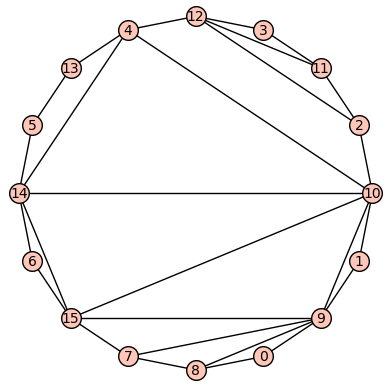

In [50]:
outerplanar_drawing(G1)
G1.plot()

In [51]:
G2 = Graph("L?_GCF?WDoB?@_")

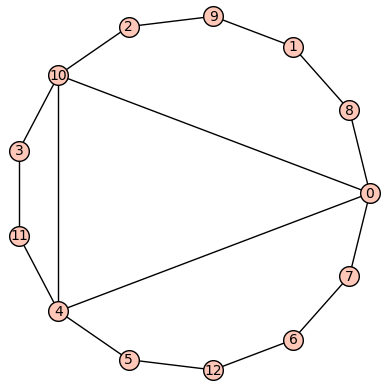

In [52]:
outerplanar_drawing(G2)
G2.plot()

In [53]:
G3 = Graph("J?AMFGpF[G?")

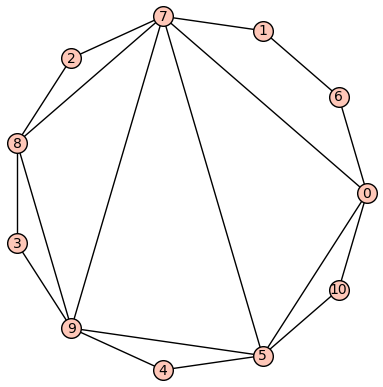

In [54]:
outerplanar_drawing(G3)
G3.plot()

In [55]:
G4 = Graph("K?AMFGpF[G@O")

In [56]:
outerplanar_test(G4)

[]

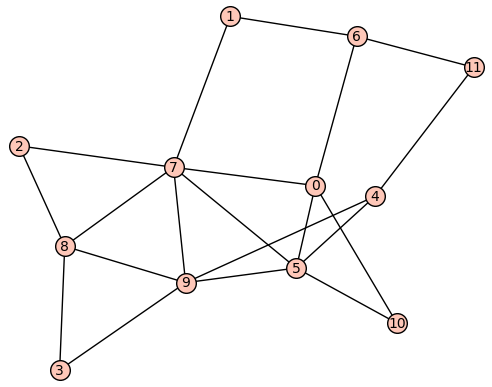

In [57]:
G4.plot()

## Coloring outerplanar graphs

In [82]:
def color_outerplanar_graph(G):
    """
    Sagemath function
    Return optimal coloring of an outerplanar graph.
    Coloring is a dicitionary mapping a vertex to its color ('red', 'green', 'blue')
    If the graph is not outerplanar, return None
    """
    # Check if the graph is outerplanar
    outer_face = outerplanar_test(G)
    if not outer_face:
        return None
    colors = dict()
    _, colors = find_colors(G, colors)
    return colors

def find_colors(G_orig, colors):
    G = G_orig.copy()
    # Check if the graph has exactly 3 vertices
    if G.order() == 3:
        colors[G.vertices()[0]] = 'red'
        colors[G.vertices()[1]] = 'green'
        colors[G.vertices()[2]] = 'blue'
        return (list(G.vertices()), colors)
    
    # Check for vertices of degree 2
    vertices_of_degree_2 = [v for v in G.vertices() if G.degree(v) == 2]
    
    # Return an empty list if no vertices of degree 2 are found
    if not vertices_of_degree_2:
        return ([], colors)
    
    # Pick an arbitrary vertex of degree 2
    v = vertices_of_degree_2[0]

    # Get the neighbors of the chosen vertex
    neighbors = G.neighbors(v)
    u = neighbors[0]
    w = neighbors[1]

    # Check if the neighbors are connected
    if not G.has_edge(u, w):
        # Add the edge between the neighbors
        G.add_edge(u, w)
    
    # Remove vertex v from the graph
    G.delete_vertex(v)

    # Recursively call the function on the modified graph
    outer_face, colors = find_colors(G, colors)
    if outer_face:
        # If the outer face is found, add the removed vertex between its neighbors
        index_u = outer_face.index(u) 
        index_w = outer_face.index(w)
        if abs(index_u - index_w) == 1:
            # If u and w are adjacent in the outer face, insert v between them
            index_v = min(index_u, index_w) + 1
        else:
            # If u and w are not adjacent, insert v at the end of the outer face
            index_v = len(outer_face)
        outer_face.insert(index_v, v)
        
        # fix the colors
        all_colors = {'red', 'green', 'blue'}
        all_colors.remove(colors[u])
        all_colors.remove(colors[w])
        colors[v] = all_colors.pop()
        return outer_face, colors
    else:
        # If no outer face is found, return an empty list
        return [], colors 
    

In [83]:
def is_coloring(G, coloring):
    for v, u in G.edges(labels=False):
        if coloring[v] == coloring[u]:
            return False
    return True

def color_graph(G, coloring, **kwargs):
    color_map = {}
    for v, c in coloring.items():
        if c in color_map:
            color_map[c].append(v)
        else:
            color_map[c] = [v]
    return G.plot(vertex_colors=color_map, **kwargs)

### Example

In [84]:
G3 = Graph("J?AMFGpF[G?")
col3 = color_outerplanar_graph(G3)

In [85]:
is_coloring(G3, col3)

True

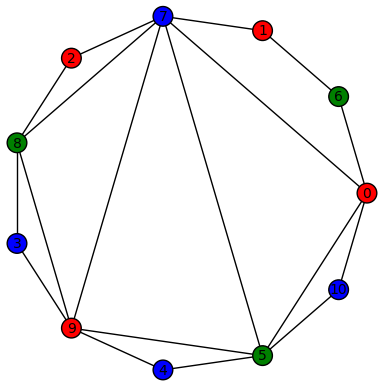

In [86]:
outerplanar_drawing(G3)
color_graph(G3, col3)